# AutoML: Automatic Machine Learning

AutoML: Automatic Machine Learning  

H2O’s AutoML is used for automating the machine learning workflow, which includes automatic training and tuning of many models within a user-specified time-limit. Stacked Ensembles will be automatically trained on collections of individual models to produce highly predictive ensemble models which, in most cases, will be the top performing models in the AutoML Leaderboard.

## Tutorials

* Intro to AutoML + Hands-on Lab - Erin LeDell, Machine Learning Scientist... [https://youtu.be/42Oo8TOl85I](https://youtu.be/42Oo8TOl85I)  
* Scalable Automatic Machine Learning in H2O [https://youtu.be/j6rqrEYQNdo](https://youtu.be/j6rqrEYQNdo)      

* Scalable Automatic Machine Learning in H2O [https://youtu.be/j6rqrEYQNdo](https://youtu.be/j6rqrEYQNdo)    


## Installing H2O and h2o python

See [http://docs.h2o.ai/h2o/latest-stable/h2o-docs/downloading.html](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/downloading.html)  

Click the Download H2O button on the [http://h2o-release.s3.amazonaws.com/h2o/latest_stable.html](http://h2o-release.s3.amazonaws.com/h2o/latest_stable.html) page. This downloads a zip file that contains everything you need to get started.


```bash
cd ~/Downloads
unzip h2o-3.20.0.1.zip
cd h2o-3.20.0.1
java -jar h2o.jar
```

Point your browser to http://localhost:54321.

**Install in Python**  

Install dependencies (prepending with sudo if needed):

```bash
pip install requests
pip install tabulate
pip install scikit-learn
pip install colorama
pip install future
```

Remove any existing H2O module for Python.

```bash
pip uninstall h2o
```

Use pip to install this version of the H2O Python module.  

```bash
pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o
```

Note: When installing H2O from pip in OS X El Capitan, users must include the --user flag. For example:


```bash
pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o --user
```

Initialize H2O in Python and run a demo to see H2O at work.

```python
python
import h2o
h2o.init()
h2o.demo("glm")
```

## Saving data

H2O model file file will be saved in one of two formats.


There are two ways to save the leader model -- binary format and MOJO format.  If you're taking your leader model to production, then we'd suggest the MOJO format since it's optimized for production use.

See [http://docs.h2o.ai/h2o/latest-stable/h2o-docs/save-and-load-model.html](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/save-and-load-model.html)    

```python

# save the model
model_path = h2o.save_model(model=model, path="/tmp/mymodel", force=True)

# or

h2o.save_model(aml.leader, path = "./models")

# or

aml.leader.download_mojo(path = "./models")

# load the model
saved_model = h2o.load_model(model_path)

```

**Saving data from runs**   


Stats about the models can be saved as text or csv or put directly in a database.

Much of the data is gathered by converting H2O objects to pandas data frame.  So anything that a pandas data frame can be saved as is supported.
[https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)    


```python
data_pd = object.as_data_frame(use_pandas=True)
```  

Otherwise data is returned as python dictionaries or lists.  

```python
[('addr_state', 258199.28125, 1.0, 0.19965953057652525), ('int_rate', 203347.0625, 0.7875585924002257, 0.15724357886013807), ('dti', 116477.5703125, 0.45111500600856147, 0.09006941033569575), ('revol_util', 110586.1484375, 0.42829766179877776, 0.08551371010176734), ('annual_inc', 96993.90625, 0.3756552139898724, 0.07500314368384206), ('loan_amnt', 95294.5, 0.36907345186500207, 0.0736890321476241), ('total_acc', 90064.8046875, 0.3488189597255124, 0.06964502975498767), ('longest_credit_length', 84291.921875, 0.3264607146345416, 0.06518099303560954), ('purpose', 77462.203125, 0.30000936776426446, 0.05989972953637317), ('emp_length', 63839.28125, 0.24724809821677224, 0.04936543922589935), ('term', 34895.7265625, 0.1351503629040408, 0.02698405801466782), ('home_ownership', 26499.876953125, 0.10263342649457897, 0.02049174175536795), ('delinq_2yrs', 20556.2578125, 0.0796139234508423, 0.015895678583550586), ('verification_status', 14689.3369140625, 0.056891470971368166, 0.01135892438795138)]
```  


## Starting H2O server

In [1]:
# import h2o package and specific estimator 
import h2o
from h2o.automl import H2OAutoML

h2o.init with python seems very sensitive the the H2O version.  If the H2O cluster version is 3.20.0.1 and the python h2o library is 3.19.0 it will fail so we set strict_version_check=False

If the H2O cluster isn't found h2o.init will start one.

Note that the current script starts each H2O instance on a different port.  It's not clear why but should we do this we should choose from only the higher ports.

A port number is a 16-bit unsigned integer, thus ranging from 0 to 65535.  There is no reason to choose a port less than 10000.  


In [2]:
h2o.init(strict_version_check=False) # start h2o

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_121"; OpenJDK Runtime Environment (Zulu 8.20.0.5-macosx) (build 1.8.0_121-b15); OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-macosx) (build 25.121-b15, mixed mode)
  Starting server from /Users/bear/anaconda/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/lh/42j8mfjx069d1bkc2wlf2pw40000gn/T/tmpxg3dfx65
  JVM stdout: /var/folders/lh/42j8mfjx069d1bkc2wlf2pw40000gn/T/tmpxg3dfx65/h2o_bear_started_from_python.out
  JVM stderr: /var/folders/lh/42j8mfjx069d1bkc2wlf2pw40000gn/T/tmpxg3dfx65/h2o_bear_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.2
H2O cluster version age:,1 month and 16 days
H2O cluster name:,H2O_from_python_bear_w4adug
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


## h2o.automl Parameters

[http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html)  

NB:  Eventually one wants to expose all the parameters to the expert user.   

**Required Data Parameters**

y: This argument is the name (or index) of the response column.  

training_frame: Specifies the training set.  

The user gives the name of the depenent variable and training file name.   


**Required Stopping Parameters**  

One of the following stopping strategies (time or number-of-model based) must be specified. When both options are set, then the AutoML run will stop as soon as it hits one of either of these limits.

max_runtime_secs: This argument controls how long the AutoML run will execute for. This defaults to 3600 seconds (1 hour).  


max_models: Specify the maximum number of models to build in an AutoML run, excluding the Stacked Ensemble models. Defaults to NULL/None.


### Optional Parameters

**Optional Data Parameters**  

x: A list/vector of predictor column names or indexes. This argument only needs to be specified if the user wants to exclude columns from the set of predictors. If all columns (other than the response) should be used in prediction, then this does not need to be set.  

validation_frame: This argument is used to specify the validation frame used for early stopping of individual models and early stopping of the grid searches (unless max_models or max_runtime_secs overrides metric-based early stopping).  

leaderboard_frame: This argument allows the user to specify a particular data frame use to score & rank models on the leaderboard. This frame will not be used for anything besides leaderboard scoring. If a leaderboard frame is not specified by the user, then the leaderboard will use cross-validation metrics instead (or if cross-validation is turned off by setting nfolds = 0, then a leaderboard frame will be generated automatically from the validation frame (if provided) or the training frame).  

fold_column: Specifies a column with cross-validation fold index assignment per observation. This is used to override the default, randomized, 5-fold cross-validation scheme for individual models in the AutoML run.  

weights_column: Specifies a column with observation weights. Giving some observation a weight of zero is equivalent to excluding it from the dataset; giving an observation a relative weight of 2 is equivalent to repeating that row twice. Negative weights are not allowed.  

ignored_columns: (Optional, Python only) Specify the column or columns (as a list/vector) to be excluded from the model. This is the converse of the x argument.  

**Optional Miscellaneous Parameters**  

nfolds: Number of folds for k-fold cross-validation of the models in the AutoML run. Defaults to 5. Use 0 to disable cross-validation; this will also disable Stacked Ensembles (thus decreasing the overall best model performance).

balance_classes: Specify whether to oversample the minority classes to balance the class distribution. This option is not enabled by default and can increase the data frame size. This option is only applicable for classification. Majority classes can be undersampled to satisfy the max_after_balance_size parameter.

class_sampling_factors: Specify the per-class (in lexicographical order) over/under-sampling ratios. By default, these ratios are automatically computed during training to obtain the class balance.

max_after_balance_size: Specify the maximum relative size of the training data after balancing class counts (balance_classes must be enabled). Defaults to 5.0. (The value can be less than 1.0).

stopping_metric: Specifies the metric to use for early stopping of the grid searches and individual models. Defaults to "AUTO". The available options are:

AUTO: This defaults to logloss for classification, deviance for regression
deviance (mean residual deviance)
logloss
MSE
RMSE
MAE
RMSLE
AUC
lift_top_group
misclassification
mean_per_class_error  

stopping_tolerance: This option specifies the relative tolerance for the metric-based stopping criterion to stop a grid search and the training of individual models within the AutoML run. This value defaults to 0.001 if the dataset is at least 1 million rows; otherwise it defaults to a bigger value determined by the size of the dataset and the non-NA-rate. In that case, the value is computed as 1/sqrt(nrows * non-NA-rate).

stopping_rounds: This argument is used to stop model training when the stopping metric (e.g. AUC) doesn’t improve for this specified number of training rounds, based on a simple moving average. In the context of AutoML, this controls early stopping both within the random grid searches as well as the individual models. Defaults to 3 and must be an non-negative integer. To disable early stopping altogether, set this to 0.

sort_metric: Specifies the metric used to sort the Leaderboard by at the end of an AutoML run. Available options include:

AUTO: This defaults to AUC for binary classification, mean_per_class_error for multinomial classification, and deviance for regression.
deviance (mean residual deviance)
logloss
MSE
RMSE
MAE
RMSLE
AUC
mean_per_class_error  

seed: Integer. Set a seed for reproducibility. AutoML can only guarantee reproducibility if max_models is used because max_runtime_secs is resource limited, meaning that if the available compute resources are not the same between runs, AutoML may be able to train more models on one run vs another. Defaults to NULL/None.

project_name: Character string to identify an AutoML project. Defaults to NULL/None, which means a project name will be auto-generated based on the training frame ID. More models can be trained and added to an existing AutoML project by specifying the same project name in muliple calls to the AutoML function (as long as the same training frame is used in subsequent runs).

exclude_algos: List/vector of character strings naming the algorithms to skip during the model-building phase. An example use is exclude_algos = ["GLM", "DeepLearning", "DRF"] in Python or exclude_algos = c("GLM", "DeepLearning", "DRF") in R. Defaults to None/NULL, which means that all appropriate H2O algorithms will be used, if the search stopping criteria allow. The algorithm names are:

GLM
DeepLearning
GBM
DRF (This includes both the Random Forest and Extremely Randomized Trees (XRT) models. Refer to the Extremely Randomized Trees section in the DRF chapter and the histogram_type parameter description for more information.)
StackedEnsemble
keep_cross_validation_predictions: Specify whether to keep the predictions of the cross-validation predictions. If set to FALSE, then running the same AutoML object for repeated runs will cause an exception because CV predictions are are required to build additional Stacked Ensemble models in AutoML. This option defaults to TRUE.


keep_cross_validation_models: Specify whether to keep the cross-validated models. Deleting cross-validation models will save memory in the H2O cluster. This option defaults to TRUE.




In [3]:
# Assume the following are passed by the user from the web interface

'''
Need a user id and project id?

'''
target='bad_loan' 
data_file='loan.csv'
run_time=333
run_id='SOME_ID_20180617_221529' # Just some arbitrary ID
server_path='/Users/bear/Documents/INFO_7390/H2O'
classification=True
scale=False
max_models=None
balance_y=False # balance_classes=balance_y
balance_threshold=0.2
project ="automl_test"  # project_name = project

In [4]:
# Use local data file or download from some type of bucket
import os

data_path=os.path.join(server_path,data_file)
data_path

'/Users/bear/Documents/INFO_7390/H2O/loan.csv'

In [5]:
# Use local data file or download from some type of bucket
if not os.path.isfile(data_path):
  data_path = 'https://raw.githubusercontent.com/h2oai/app-consumer-loan/master/data/loan.csv'

# Load data into H2O
df = h2o.import_file(data_path)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [6]:
df.describe()

Rows:163987
Cols:15




,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
type,int,enum,real,int,enum,real,enum,enum,real,int,real,int,int,int,enum
mins,500.0,,5.42,0.0,,1896.0,,,0.0,0.0,0.0,1.0,0.0,0.0,
mean,13074.169141456336,,13.715904065566173,5.68435293299533,,71915.67051974901,,,15.881530121290117,0.2273570060625282,54.07917280242258,24.579733834274638,0.1830388994249544,14.854273655448353,
maxs,35000.0,,26.06,10.0,,7141778.0,,,39.99,29.0,150.70000000000002,118.0,1.0,65.0,
sigma,7993.556188734649,,4.391939870545795,3.6106637311002365,,59070.915654918244,,,7.587668224192549,0.6941679229284182,25.285366766770505,11.685190365910659,0.3866995896078875,6.947732922546696,
zeros,0,,0,14248,,0,,,270,139459,1562,0,133971,11,
missing,0,0,0,5804,0,4,0,0,0,29,193,29,0,29,0
0,5000.0,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0.0,26.0,verified
1,2500.0,60 months,15.27,0.0,RENT,30000.0,car,GA,1.0,0.0,9.4,4.0,1.0,12.0,verified
2,2400.0,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0.0,10.0,not verified


In [7]:
# assign target and inputs for logistic regression
y = target
X = [name for name in df.columns if name != y]
print(y)
print(X)

bad_loan
['loan_amnt', 'term', 'int_rate', 'emp_length', 'home_ownership', 'annual_inc', 'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'revol_util', 'total_acc', 'longest_credit_length', 'verification_status']


In [8]:
# determine column types
ints, reals, enums = [], [], []
for key, val in df.types.items():
    if key in X:
        if val == 'enum':
            enums.append(key)
        elif val == 'int':
            ints.append(key)            
        else: 
            reals.append(key)

print(ints)
print(enums)
print(reals)

['loan_amnt', 'emp_length', 'delinq_2yrs', 'total_acc', 'longest_credit_length']
['term', 'home_ownership', 'purpose', 'addr_state', 'verification_status']
['int_rate', 'annual_inc', 'dti', 'revol_util']


In [9]:
# impute missing values
_ = df[reals].impute(method='mean')
_ = df[ints].impute(method='median')

if scale:
    df[reals] = df[reals].scale()
    df[ints] = df[ints].scale()

In [10]:
# set target to factor for classification by default or if user specifies classification
if classification:
    df[y] = df[y].asfactor()

In [11]:
df[y].levels()

[['0', '1']]

### balance_classes check 

If one class in two class classification is less than 20% of the total then one should set balance_classes=True

That is,

balance_classes=balance_y


In [12]:
if classification:
    class_percentage = y_balance=df[y].mean()[0]/(df[y].max()-df[y].min())
    if class_percentage < balance_threshold:
        balance_y=True
        
        

In [13]:
print(run_time)
type(run_time)

333


int

## Cross-validate rather than take a test training split

Cross-validation rather than taking a test training split reduces the variance of the estimates of goodness of fit statistics.  In rare cases one should take a test training split but this should be left to the expert users.

This also means the pro user can just upload the data and not worry about taking a test training split.  

We can pass the original, full dataset, `df` (without passing a `leaderboard_frame`).  This is a more efficient use of our data since we can use 100% of the data for training, rather than 80% or so.  This time our leaderboard will use cross-validated metrics. It also gives better estimates of goodness of fit statistics.

*Note: Using an explicit `leaderboard_frame` for scoring may be useful in some cases, which is why the option is available.*  

But it's not preferable in most cases.  Leave it as an expert option.  


In [14]:
# automl
# runs for run_time seconds then builds a stacked ensemble
aml = H2OAutoML(max_runtime_secs=run_time,project_name = project,balance_classes=balance_y) # init automl, run for 300 seconds
aml.train(x=X,  
           y=y,
           training_frame=df) 

AutoML progress: |████████████████████████████████████████████████████████| 100%


## Leaderboard

Next, we will view the AutoML Leaderboard.  Since we did not specify a `leaderboard_frame` in the `H2OAutoML.train()` method for scoring and ranking the models, the AutoML leaderboard uses cross-validation metrics to rank the models.  

A default performance metric for each machine learning task (binary classification, multiclass classification, regression) is specified internally and the leaderboard will be sorted by that metric.  In the case of binary classification, the default ranking metric is Area Under the ROC Curve (AUC).  In the future, the user will be able to specify any of the H2O metrics so that different metrics can be used to generate rankings on the leaderboard.

The leader model is stored at `aml.leader` and the leaderboard is stored at `aml.leaderboard`.

In [15]:
# view leaderboard
lb = aml.leaderboard
lb

model_id,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20190108_000309,0.702053,0.440191,0.352014,0.372258,0.138576
StackedEnsemble_BestOfFamily_AutoML_20190108_000309,0.702053,0.440191,0.352014,0.372258,0.138576
GLM_grid_1_AutoML_20190108_000309_model_1,0.698362,0.439271,0.354907,0.371955,0.138351
XRT_1_AutoML_20190108_000309,0.688334,0.472261,0.364171,0.382791,0.146529
DRF_1_AutoML_20190108_000309,0.686498,0.478133,0.364403,0.383717,0.147239


Now we will view a snapshot of the top models.  Here we should see the two Stacked Ensembles at or near the top of the leaderboard.  Stacked Ensembles can almost always outperform a single model.

In [16]:
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20190108_000309
No model summary for this model


ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.0748160248427708
RMSE: 0.27352518136868276
LogLoss: 0.2770108718654861
Null degrees of freedom: 147784
Residual degrees of freedom: 147781
Null deviance: 140732.20131171282
Residual deviance: 81876.10339728172
AIC: 81884.10339728172
AUC: 0.9705354292408278
pr_auc: 0.8960099911776978
Gini: 0.9410708584816556
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3054804393299643: 


,0,1,Error,Rate
0,114475.0,6243.0,0.0517,(6243.0/120718.0)
1,4811.0,22256.0,0.1777,(4811.0/27067.0)
Total,119286.0,28499.0,0.0748,(11054.0/147785.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3054804,0.8010654,216.0
max f2,0.2324010,0.8527882,256.0
max f0point5,0.4116258,0.8349729,167.0
max accuracy,0.3440950,0.9274622,198.0
max precision,0.9638314,1.0,0.0
max recall,0.1052357,1.0,361.0
max specificity,0.9638314,1.0,0.0
max absolute_mcc,0.3054804,0.7554259,216.0
max min_per_class_accuracy,0.2517271,0.9051343,245.0
max mean_per_class_accuracy,0.2395344,0.9063511,252.0


Gains/Lift Table: Avg response rate: 18.32 %, avg score: 21.52 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100010,0.8231913,5.4599697,5.4599697,1.0,0.8664285,1.0,0.8664285,0.0546052,0.0546052,445.9969705,445.9969705
,2,0.0200020,0.7645343,5.4599697,5.4599697,1.0,0.7922026,1.0,0.8293156,0.0546052,0.1092105,445.9969705,445.9969705
,3,0.0300030,0.7172474,5.4599697,5.4599697,1.0,0.7405818,1.0,0.7997376,0.0546052,0.1638157,445.9969705,445.9969705
,4,0.0400041,0.6758864,5.4304164,5.4525814,0.9945873,0.6959487,0.9986468,0.7737904,0.0543097,0.2181254,443.0416418,445.2581383
,5,0.0500051,0.6383709,5.3417566,5.4304164,0.9783491,0.6571369,0.9945873,0.7504597,0.0534230,0.2715484,434.1756558,443.0416418
,6,0.1000034,0.4826144,4.9922256,5.2113359,0.9143321,0.5558423,0.9544624,0.6531576,0.2496028,0.5211512,399.2225650,421.1335859
,7,0.1500017,0.3715061,3.7611647,4.7279673,0.6888618,0.4241561,0.8659329,0.5768272,0.1880519,0.7092031,276.1164677,372.7967271
,8,0.2,0.2957882,2.5648335,4.1872021,0.4697523,0.3308477,0.7668911,0.5153344,0.1282373,0.8374404,156.4833515,318.7202128
,9,0.3000034,0.2099951,1.1785170,3.1842845,0.2158468,0.2476441,0.5832055,0.4261023,0.1178557,0.9552961,17.8517042,218.4284479
,10,0.4,0.1682202,0.3351057,2.4720139,0.0613750,0.1869477,0.4527523,0.3663157,0.0335094,0.9888056,-66.4894267,147.2013891




ModelMetricsBinomialGLM: stackedensemble
** Reported on validation data. **

MSE: 0.1374305415577651
RMSE: 0.370716254779535
LogLoss: 0.4374035749971233
Null degrees of freedom: 16201
Residual degrees of freedom: 16198
Null deviance: 15373.717640908228
Residual deviance: 14173.625444206784
AIC: 14181.625444206784
AUC: 0.7038412027583177
pr_auc: 0.34120380509032733
Gini: 0.4076824055166355
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.19535344211739553: 


,0,1,Error,Rate
0,9850.0,3403.0,0.2568,(3403.0/13253.0)
1,1367.0,1582.0,0.4635,(1367.0/2949.0)
Total,11217.0,4985.0,0.2944,(4770.0/16202.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1953534,0.3987900,248.0
max f2,0.1166556,0.5648862,337.0
max f0point5,0.2709433,0.3762722,185.0
max accuracy,0.6365348,0.8189730,28.0
max precision,0.7519927,0.6470588,7.0
max recall,0.0720133,1.0,397.0
max specificity,0.8355440,0.9999245,0.0
max absolute_mcc,0.2288610,0.2366986,218.0
max min_per_class_accuracy,0.1667771,0.6414397,277.0
max mean_per_class_accuracy,0.1542798,0.6472159,291.0


Gains/Lift Table: Avg response rate: 18.20 %, avg score: 18.47 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100605,0.6070463,2.9324155,2.9324155,0.5337423,0.6747785,0.5337423,0.6747785,0.0295015,0.0295015,193.2415480,193.2415480
,2,0.0200593,0.5374457,2.6792049,2.8061998,0.4876543,0.5705091,0.5107692,0.6228042,0.0267887,0.0562903,167.9204920,180.6199755
,3,0.0300580,0.4880498,2.4418070,2.6849849,0.4444444,0.5106372,0.4887064,0.5854920,0.0244151,0.0807053,144.1807016,168.4984922
,4,0.0400568,0.4585920,2.5096350,2.6412150,0.4567901,0.4730993,0.4807396,0.5574371,0.0250933,0.1057986,150.9634988,164.1214984
,5,0.0500555,0.4315051,2.1026672,2.5336382,0.3827160,0.4444311,0.4611591,0.5348638,0.0210241,0.1268227,110.2667152,153.3638229
,6,0.1000494,0.3337569,2.0280564,2.2810033,0.3691358,0.3752998,0.4151758,0.4551310,0.1013903,0.2282130,102.8056382,128.1003253
,7,0.1500432,0.2806429,1.8313553,2.1311822,0.3333333,0.3060461,0.3879062,0.4054565,0.0915565,0.3197694,83.1355262,113.1182244
,8,0.2000370,0.2443961,1.5939574,1.9969175,0.2901235,0.2612294,0.3634681,0.3694109,0.0796880,0.3994574,59.3957357,99.6917462
,9,0.3000247,0.1976308,1.2582089,1.7507319,0.2290123,0.2187809,0.3186587,0.3192112,0.1258054,0.5252628,25.8208893,75.0731928
,10,0.4000123,0.1687228,1.0988132,1.5877774,0.2,0.1820912,0.2889986,0.2849365,0.1098678,0.6351306,9.8813157,58.7777382




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.13857609376371857
RMSE: 0.3722581010048251
LogLoss: 0.4401913910510862
Null degrees of freedom: 147784
Residual degrees of freedom: 147781
Null deviance: 140733.9728124682
Residual deviance: 130107.36945296955
AIC: 130115.36945296955
AUC: 0.7020527753495225
pr_auc: 0.3375985314167658
Gini: 0.40410555069904497
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.17298272394626243: 


,0,1,Error,Rate
0,81649.0,39069.0,0.3236,(39069.0/120718.0)
1,10296.0,16771.0,0.3804,(10296.0/27067.0)
Total,91945.0,55840.0,0.334,(49365.0/147785.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1729827,0.4045738,275.0
max f2,0.1166841,0.5633569,341.0
max f0point5,0.2578390,0.3662781,202.0
max accuracy,0.6424048,0.8173698,31.0
max precision,0.8611637,1.0,0.0
max recall,0.0700469,1.0,397.0
max specificity,0.8611637,1.0,0.0
max absolute_mcc,0.1825932,0.2367313,265.0
max min_per_class_accuracy,0.1657609,0.6461004,282.0
max mean_per_class_accuracy,0.1604917,0.6483125,288.0


Gains/Lift Table: Avg response rate: 18.32 %, avg score: 18.32 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100010,0.5992652,2.8149506,2.8149506,0.5155616,0.6651941,0.5155616,0.6651941,0.0281524,0.0281524,181.4950551,181.4950551
,2,0.0200020,0.5304044,2.6006892,2.7078199,0.4763194,0.5618491,0.4959405,0.6135216,0.0260095,0.0541619,160.0689223,170.7819887
,3,0.0300030,0.4841323,2.3938162,2.6031520,0.4384303,0.5064587,0.4767704,0.5778339,0.0239406,0.0781025,139.3816217,160.3151997
,4,0.0400041,0.4512997,2.2201907,2.5074117,0.4066306,0.4675155,0.4592355,0.5502543,0.0222042,0.1003066,122.0190658,150.7411662
,5,0.0500051,0.4240390,2.2682147,2.4595723,0.4154263,0.4372611,0.4504736,0.5276557,0.0226844,0.1229911,126.8214749,145.9572280
,6,0.1000034,0.3321782,2.0098955,2.2347491,0.3681148,0.3726242,0.4092970,0.4501452,0.1004914,0.2234825,100.9895466,123.4749086
,7,0.1500017,0.2786483,1.7675257,2.0790150,0.3237245,0.3035444,0.3807741,0.4012804,0.0883733,0.3118558,76.7525718,107.9014989
,8,0.2,0.2425797,1.5857484,1.9557025,0.2904317,0.2595146,0.3581893,0.3658402,0.0792847,0.3911405,58.5748408,95.5702516
,9,0.3000034,0.1959714,1.3695181,1.7603033,0.2508289,0.2172719,0.3224017,0.3163163,0.1369564,0.5280969,36.9518079,76.0303297
,10,0.4,0.1667087,1.1305662,1.6028743,0.2070646,0.1805241,0.2935684,0.2823694,0.1130528,0.6411497,13.0566200,60.2874349


In [17]:
aml.leader.algo

'stackedensemble'

In [18]:
dir(aml.leader)

['F0point5',
 'F1',
 'F2',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_bc',
 '_bcin',
 '_check_and_save_parm',
 '_check_targets',
 '_compute_algo',
 '_estimator_type',
 '_future',
 '_get_metrics',
 '_have_mojo',
 '_have_pojo',
 '_id',
 '_is_xvalidated',
 '_job',
 '_keyify_if_h2oframe',
 '_metrics_class',
 '_model_json',
 '_parms',
 '_plot',
 '_requires_training_frame',
 '_resolve_model',
 '_verify_training_frame_params',
 '_xval_keys',
 'accuracy',
 'actual_params',
 'aic',
 'algo',
 'auc',
 'base_models',
 'biases',
 'catoffsets',
 'coef',
 'coef_norm',
 'confusion_matrix',
 'convert_H2OXGBoostParams_2_XGBoostParams',
 'cross_validation_fold_assi

## Ensemble Exploration

To understand how the ensemble works, let's take a peek inside the Stacked Ensemble "All Models" model.  The "All Models" ensemble is an ensemble of all of the individual models in the AutoML run.  This is often the top performing model on the leaderboard.

In [19]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
aml_leaderboard_df

,model_id,auc,logloss,mean_per_class_error,rmse,mse
0,StackedEnsemble_AllModels_AutoML_20190108_000309,0.702053,0.440191,0.352014,0.372258,0.138576
1,StackedEnsemble_BestOfFamily_AutoML_20190108_0...,0.702053,0.440191,0.352014,0.372258,0.138576
2,GLM_grid_1_AutoML_20190108_000309_model_1,0.698362,0.439271,0.354907,0.371955,0.138351
3,XRT_1_AutoML_20190108_000309,0.688334,0.472261,0.364171,0.382791,0.146529
4,DRF_1_AutoML_20190108_000309,0.686498,0.478133,0.364403,0.383717,0.147239


## Getting models

Individul models can ne found through a search of the leader board or directly by the name.  

In [20]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(aml.leader.metalearner()['name'])

In [21]:
metalearner.coef_norm()

{'DRF_1_AutoML_20190108_000309': 0.12995000876961782,
 'GLM_grid_1_AutoML_20190108_000309_model_1': 0.41137246925237375,
 'Intercept': -1.6206460295544853,
 'XRT_1_AutoML_20190108_000309': 0.14566705411351252}

/Users/bear/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


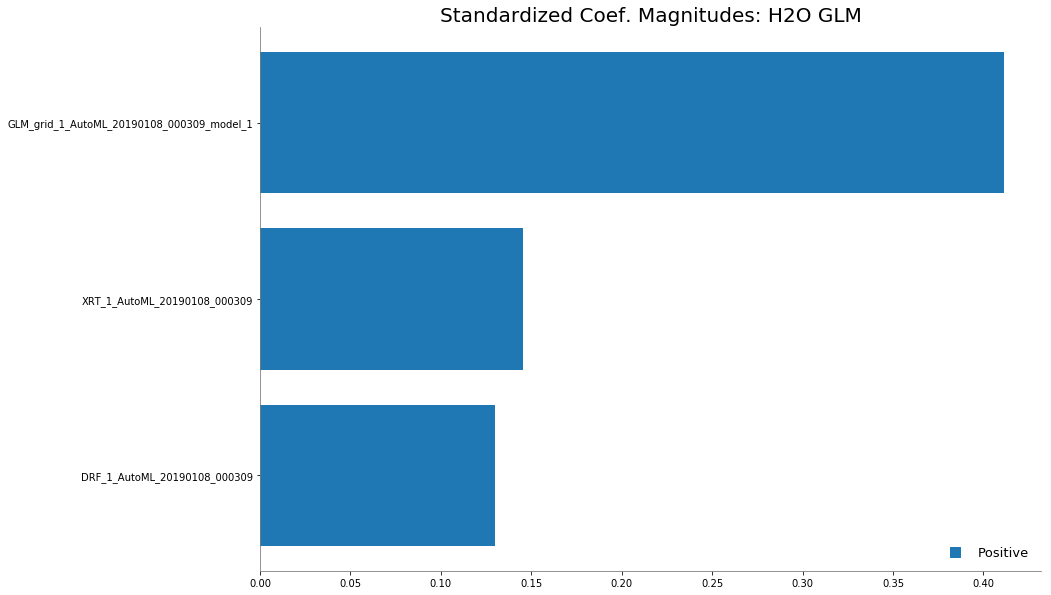

In [22]:
%matplotlib inline
metalearner.std_coef_plot()

**Getting a model directly by name**

In [23]:
aml_leaderboard_df.head()

,model_id,auc,logloss,mean_per_class_error,rmse,mse
0,StackedEnsemble_AllModels_AutoML_20190108_000309,0.702053,0.440191,0.352014,0.372258,0.138576
1,StackedEnsemble_BestOfFamily_AutoML_20190108_0...,0.702053,0.440191,0.352014,0.372258,0.138576
2,GLM_grid_1_AutoML_20190108_000309_model_1,0.698362,0.439271,0.354907,0.371955,0.138351
3,XRT_1_AutoML_20190108_000309,0.688334,0.472261,0.364171,0.382791,0.146529
4,DRF_1_AutoML_20190108_000309,0.686498,0.478133,0.364403,0.383717,0.147239


In [24]:
m_id=''
for model in aml_leaderboard_df['model_id']:
    if 'StackedEnsemble' not in model:
      print (model)
      if m_id=='':
            m_id=model
print ("model_id ", m_id)

GLM_grid_1_AutoML_20190108_000309_model_1
XRT_1_AutoML_20190108_000309
DRF_1_AutoML_20190108_000309
model_id  GLM_grid_1_AutoML_20190108_000309_model_1


In [25]:
non_stacked= h2o.get_model(m_id)
print (non_stacked.algo)

glm


In [26]:
dir(non_stacked)

['F0point5',
 'F1',
 'F2',
 'Lambda',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_bc',
 '_bcin',
 '_check_and_save_parm',
 '_check_targets',
 '_compute_algo',
 '_estimator_type',
 '_future',
 '_get_metrics',
 '_have_mojo',
 '_have_pojo',
 '_id',
 '_is_xvalidated',
 '_job',
 '_keyify_if_h2oframe',
 '_metrics_class',
 '_model_json',
 '_parms',
 '_plot',
 '_requires_training_frame',
 '_resolve_model',
 '_verify_training_frame_params',
 '_xval_keys',
 'accuracy',
 'actual_params',
 'aic',
 'algo',
 'alpha',
 'auc',
 'balance_classes',
 'beta_constraints',
 'beta_epsilon',
 'biases',
 'catoffsets',
 'class_sampling_factors',
 'coef',
 'coef_norm',
 'co

Note that since this is a pandas dataframe the data can be saved.

The type of exploration depends on the learner.  If the learner isn't an ensemble then ensemble exploration doesn't make sense.  


Examine the variable importance of the metalearner (combiner) algorithm in the ensemble.  This shows us how much each base learner is contributing to the ensemble. The AutoML Stacked Ensembles use the default metalearner algorithm (GLM with non-negative weights), so the variable importance of the metalearner is actually the standardized coefficient magnitudes of the GLM. 

## Save Leader Model

There are two ways to save the leader model -- binary format and MOJO format.  If you're taking your leader model to production, then we'd suggest the MOJO format since it's optimized for production use.

In [27]:
h2o.save_model(aml.leader, path = "./models")

'/Users/bear/Documents/CSYE_7245/H2O/models/StackedEnsemble_AllModels_AutoML_20190108_000309'

In [28]:
aml.leader.download_mojo(path = "./models")

'/Users/bear/Documents/CSYE_7245/H2O/models/StackedEnsemble_AllModels_AutoML_20190108_000309.zip'

## Making predictions

If one wants predictions the user will do this on new data.

Here we are taking 10% of original file just to show the syntax

In [29]:
# split into training and test for showing how to predict
train, test = df.split_frame([0.8])

## Predict Using Leader Model

If you need to generate predictions on a test set, you can make predictions on the `"H2OAutoML"` object directly, or on the leader model object.

In [30]:
pred = aml.predict(test)
pred.head()

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict,p0,p1
0,0.870901,0.129099
0,0.829689,0.170311
0,0.8714,0.1286
1,0.792068,0.207932
0,0.881985,0.118015
0,0.902756,0.0972436
1,0.790041,0.209959
0,0.849584,0.150416
0,0.87083,0.12917
1,0.799034,0.200966


## model_performance()

The standard `model_performance()` method can be applied to the AutoML leader model and a test set to generate an H2O model performance object.


In [31]:
perf = aml.leader.model_performance(test)
perf


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.07990584759654235
RMSE: 0.28267622396753206
LogLoss: 0.29029339065541043
Null degrees of freedom: 32806
Residual degrees of freedom: 32803
Null deviance: 31036.082029430923
Residual deviance: 19047.3105344641
AIC: 19055.3105344641
AUC: 0.9488501439752044
pr_auc: 0.8533316712111314
Gini: 0.8977002879504088
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2975039531508158: 


,0,1,Error,Rate
0,25252.0,1615.0,0.0601,(1615.0/26867.0)
1,1270.0,4670.0,0.2138,(1270.0/5940.0)
Total,26522.0,6285.0,0.0879,(2885.0/32807.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2975040,0.7640082,210.0
max f2,0.2215830,0.8121077,254.0
max f0point5,0.4122572,0.8071117,158.0
max accuracy,0.3616531,0.9162069,179.0
max precision,0.9651071,1.0,0.0
max recall,0.0783171,1.0,391.0
max specificity,0.9651071,1.0,0.0
max absolute_mcc,0.2975040,0.7104510,210.0
max min_per_class_accuracy,0.2349870,0.8794613,246.0
max mean_per_class_accuracy,0.2315331,0.8801173,248.0


Gains/Lift Table: Avg response rate: 18.11 %, avg score: 21.19 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100283,0.8100592,5.5230640,5.5230640,1.0,0.8597813,1.0,0.8597813,0.0553872,0.0553872,452.3063973,452.3063973
,2,0.0200262,0.7543489,5.5230640,5.5230640,1.0,0.7802025,1.0,0.8200524,0.0552189,0.1106061,452.3063973,452.3063973
,3,0.0300241,0.7061689,5.4388709,5.4950281,0.9847561,0.7297811,0.9949239,0.7899925,0.0543771,0.1649832,443.8870925,449.5028115
,4,0.0400219,0.6665688,5.4220323,5.4767931,0.9817073,0.6847444,0.9916222,0.7637005,0.0542088,0.2191919,442.2032315,447.6793064
,5,0.0500198,0.6223473,5.2704848,5.4355566,0.9542683,0.6444875,0.9841560,0.7398725,0.0526936,0.2718855,427.0484828,443.5556561
,6,0.1000091,0.4627741,4.8259455,5.1308439,0.8737805,0.5397761,0.9289851,0.6398548,0.2412458,0.5131313,382.5945533,413.0843947
,7,0.1499985,0.3554582,3.3879283,4.5499901,0.6134146,0.4063965,0.8238163,0.5620512,0.1693603,0.6824916,238.7928266,354.9990113
,8,0.2000183,0.2868342,2.3896255,4.0097343,0.4326630,0.3193148,0.7259982,0.5013486,0.1195286,0.8020202,138.9625485,300.9734344
,9,0.2999970,0.2071195,1.1399739,3.0533419,0.2064024,0.2420204,0.5528348,0.4149234,0.1139731,0.9159933,13.9973875,205.3341910
,10,0.4000061,0.1677987,0.4174702,2.3943238,0.0755867,0.1854381,0.4335137,0.3575477,0.0417508,0.9577441,-58.2529758,139.4323778


In [32]:
dir(perf)

['F0point5',
 'F1',
 'F2',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_algo',
 '_bc',
 '_bcin',
 '_has',
 '_metric_json',
 '_on_train',
 '_on_valid',
 '_on_xval',
 'accuracy',
 'aic',
 'auc',
 'confusion_matrix',
 'custom_metric_name',
 'custom_metric_value',
 'error',
 'fallout',
 'find_idx_by_threshold',
 'find_threshold_by_max_metric',
 'fnr',
 'fpr',
 'fprs',
 'gains_lift',
 'gini',
 'logloss',
 'mae',
 'make',
 'max_per_class_error',
 'mcc',
 'mean_per_class_error',
 'mean_residual_deviance',
 'metric',
 'missrate',
 'mse',
 'nobs',
 'null_degrees_of_freedom',
 'null_deviance',
 'plot',
 'pr_auc',
 'precision',
 'r2',
 'recall

In [33]:
d=perf.confusion_matrix()
d

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2975039531508158: 


,0,1,Error,Rate
0,25252.0,1615.0,0.0601,(1615.0/26867.0)
1,1270.0,4670.0,0.2138,(1270.0/5940.0)
Total,26522.0,6285.0,0.0879,(2885.0/32807.0)


In [34]:
dir(perf)

['F0point5',
 'F1',
 'F2',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_algo',
 '_bc',
 '_bcin',
 '_has',
 '_metric_json',
 '_on_train',
 '_on_valid',
 '_on_xval',
 'accuracy',
 'aic',
 'auc',
 'confusion_matrix',
 'custom_metric_name',
 'custom_metric_value',
 'error',
 'fallout',
 'find_idx_by_threshold',
 'find_threshold_by_max_metric',
 'fnr',
 'fpr',
 'fprs',
 'gains_lift',
 'gini',
 'logloss',
 'mae',
 'make',
 'max_per_class_error',
 'mcc',
 'mean_per_class_error',
 'mean_residual_deviance',
 'metric',
 'missrate',
 'mse',
 'nobs',
 'null_degrees_of_freedom',
 'null_deviance',
 'plot',
 'pr_auc',
 'precision',
 'r2',
 'recall

In R we get plots like:
    
    #compute performance
perf <- h2o.performance(automl_leader,conv_data.hex)
h2o.confusionMatrix(perf)
h2o.accuracy(perf)
h2o.tpr(perf)

In [35]:
aml.leader.algo

'stackedensemble'

In [36]:
dir(aml.leader)

['F0point5',
 'F1',
 'F2',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_bc',
 '_bcin',
 '_check_and_save_parm',
 '_check_targets',
 '_compute_algo',
 '_estimator_type',
 '_future',
 '_get_metrics',
 '_have_mojo',
 '_have_pojo',
 '_id',
 '_is_xvalidated',
 '_job',
 '_keyify_if_h2oframe',
 '_metrics_class',
 '_model_json',
 '_parms',
 '_plot',
 '_requires_training_frame',
 '_resolve_model',
 '_verify_training_frame_params',
 '_xval_keys',
 'accuracy',
 'actual_params',
 'aic',
 'algo',
 'auc',
 'base_models',
 'biases',
 'catoffsets',
 'coef',
 'coef_norm',
 'confusion_matrix',
 'convert_H2OXGBoostParams_2_XGBoostParams',
 'cross_validation_fold_assi

In [37]:
aml.leader.model_performance(test).auc() 

0.9488501439752044

In [38]:
best_perf = aml.leader.model_performance()
best_perf


ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.0748160248427708
RMSE: 0.27352518136868276
LogLoss: 0.2770108718654861
Null degrees of freedom: 147784
Residual degrees of freedom: 147781
Null deviance: 140732.20131171282
Residual deviance: 81876.10339728172
AIC: 81884.10339728172
AUC: 0.9705354292408278
pr_auc: 0.8960099911776978
Gini: 0.9410708584816556
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3054804393299643: 


,0,1,Error,Rate
0,114475.0,6243.0,0.0517,(6243.0/120718.0)
1,4811.0,22256.0,0.1777,(4811.0/27067.0)
Total,119286.0,28499.0,0.0748,(11054.0/147785.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3054804,0.8010654,216.0
max f2,0.2324010,0.8527882,256.0
max f0point5,0.4116258,0.8349729,167.0
max accuracy,0.3440950,0.9274622,198.0
max precision,0.9638314,1.0,0.0
max recall,0.1052357,1.0,361.0
max specificity,0.9638314,1.0,0.0
max absolute_mcc,0.3054804,0.7554259,216.0
max min_per_class_accuracy,0.2517271,0.9051343,245.0
max mean_per_class_accuracy,0.2395344,0.9063511,252.0


Gains/Lift Table: Avg response rate: 18.32 %, avg score: 21.52 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100010,0.8231913,5.4599697,5.4599697,1.0,0.8664285,1.0,0.8664285,0.0546052,0.0546052,445.9969705,445.9969705
,2,0.0200020,0.7645343,5.4599697,5.4599697,1.0,0.7922026,1.0,0.8293156,0.0546052,0.1092105,445.9969705,445.9969705
,3,0.0300030,0.7172474,5.4599697,5.4599697,1.0,0.7405818,1.0,0.7997376,0.0546052,0.1638157,445.9969705,445.9969705
,4,0.0400041,0.6758864,5.4304164,5.4525814,0.9945873,0.6959487,0.9986468,0.7737904,0.0543097,0.2181254,443.0416418,445.2581383
,5,0.0500051,0.6383709,5.3417566,5.4304164,0.9783491,0.6571369,0.9945873,0.7504597,0.0534230,0.2715484,434.1756558,443.0416418
,6,0.1000034,0.4826144,4.9922256,5.2113359,0.9143321,0.5558423,0.9544624,0.6531576,0.2496028,0.5211512,399.2225650,421.1335859
,7,0.1500017,0.3715061,3.7611647,4.7279673,0.6888618,0.4241561,0.8659329,0.5768272,0.1880519,0.7092031,276.1164677,372.7967271
,8,0.2,0.2957882,2.5648335,4.1872021,0.4697523,0.3308477,0.7668911,0.5153344,0.1282373,0.8374404,156.4833515,318.7202128
,9,0.3000034,0.2099951,1.1785170,3.1842845,0.2158468,0.2476441,0.5832055,0.4261023,0.1178557,0.9552961,17.8517042,218.4284479
,10,0.4,0.1682202,0.3351057,2.4720139,0.0613750,0.1869477,0.4527523,0.3663157,0.0335094,0.9888056,-66.4894267,147.2013891


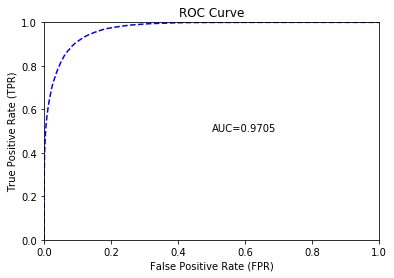

In [39]:
best_perf.plot()

In [40]:
aml.leader.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3054804393299643: 


,0,1,Error,Rate
0,114475.0,6243.0,0.0517,(6243.0/120718.0)
1,4811.0,22256.0,0.1777,(4811.0/27067.0)
Total,119286.0,28499.0,0.0748,(11054.0/147785.0)


In [41]:
roc=aml.leader.roc()
roc

([0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  8.283768783445716e-06,
  1.656753756689143e-05,
  4.141884391722858e-05,
  5.798638148412001e-05,
  5.798638148412001e-05,
  6.627015026756573e-05,
  6.627015026756573e-05,
  6.627015026756573e-05,
  8.283768783445716e-05,
  9.94052254013486e-05,
  0.00011597276296824003,
  0.00013254030053513145,
  0.00018224291323580576,
  0.00020709421958614292,
  0.0002567968322868172,
  0.0002650806010702629,
  0.0002899319074206001,
  0.00033135075133782865,
  0.0003562020576881658,
  0.00038105336403850297,
  0.00042247220795573154,
  0.0004224722

In [42]:
aml.leader.tnr

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20190108_000309
No model summary for this model


ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.0748160248427708
RMSE: 0.27352518136868276
LogLoss: 0.2770108718654861
Null degrees of freedom: 147784
Residual degrees of freedom: 147781
Null deviance: 140732.20131171282
Residual deviance: 81876.10339728172
AIC: 81884.10339728172
AUC: 0.9705354292408278
pr_auc: 0.8960099911776978
Gini: 0.9410708584816556
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3054804393299643: 


,0,1,Error,Rate
0,114475.0,6243.0,0.0517,(6243.0/120718.0)
1,4811.0,22256.0,0.1777,(4811.0/27067.0)
Total,119286.0,28499.0,0.0748,(11054.0/147785.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3054804,0.8010654,216.0
max f2,0.2324010,0.8527882,256.0
max f0point5,0.4116258,0.8349729,167.0
max accuracy,0.3440950,0.9274622,198.0
max precision,0.9638314,1.0,0.0
max recall,0.1052357,1.0,361.0
max specificity,0.9638314,1.0,0.0
max absolute_mcc,0.3054804,0.7554259,216.0
max min_per_class_accuracy,0.2517271,0.9051343,245.0
max mean_per_class_accuracy,0.2395344,0.9063511,252.0


Gains/Lift Table: Avg response rate: 18.32 %, avg score: 21.52 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100010,0.8231913,5.4599697,5.4599697,1.0,0.8664285,1.0,0.8664285,0.0546052,0.0546052,445.9969705,445.9969705
,2,0.0200020,0.7645343,5.4599697,5.4599697,1.0,0.7922026,1.0,0.8293156,0.0546052,0.1092105,445.9969705,445.9969705
,3,0.0300030,0.7172474,5.4599697,5.4599697,1.0,0.7405818,1.0,0.7997376,0.0546052,0.1638157,445.9969705,445.9969705
,4,0.0400041,0.6758864,5.4304164,5.4525814,0.9945873,0.6959487,0.9986468,0.7737904,0.0543097,0.2181254,443.0416418,445.2581383
,5,0.0500051,0.6383709,5.3417566,5.4304164,0.9783491,0.6571369,0.9945873,0.7504597,0.0534230,0.2715484,434.1756558,443.0416418
,6,0.1000034,0.4826144,4.9922256,5.2113359,0.9143321,0.5558423,0.9544624,0.6531576,0.2496028,0.5211512,399.2225650,421.1335859
,7,0.1500017,0.3715061,3.7611647,4.7279673,0.6888618,0.4241561,0.8659329,0.5768272,0.1880519,0.7092031,276.1164677,372.7967271
,8,0.2,0.2957882,2.5648335,4.1872021,0.4697523,0.3308477,0.7668911,0.5153344,0.1282373,0.8374404,156.4833515,318.7202128
,9,0.3000034,0.2099951,1.1785170,3.1842845,0.2158468,0.2476441,0.5832055,0.4261023,0.1178557,0.9552961,17.8517042,218.4284479
,10,0.4,0.1682202,0.3351057,2.4720139,0.0613750,0.1869477,0.4527523,0.3663157,0.0335094,0.9888056,-66.4894267,147.2013891




ModelMetricsBinomialGLM: stackedensemble
** Reported on validation data. **

MSE: 0.1374305415577651
RMSE: 0.370716254779535
LogLoss: 0.4374035749971233
Null degrees of freedom: 16201
Residual degrees of freedom: 16198
Null deviance: 15373.717640908228
Residual deviance: 14173.625444206784
AIC: 14181.625444206784
AUC: 0.7038412027583177
pr_auc: 0.34120380509032733
Gini: 0.4076824055166355
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.19535344211739553: 


,0,1,Error,Rate
0,9850.0,3403.0,0.2568,(3403.0/13253.0)
1,1367.0,1582.0,0.4635,(1367.0/2949.0)
Total,11217.0,4985.0,0.2944,(4770.0/16202.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1953534,0.3987900,248.0
max f2,0.1166556,0.5648862,337.0
max f0point5,0.2709433,0.3762722,185.0
max accuracy,0.6365348,0.8189730,28.0
max precision,0.7519927,0.6470588,7.0
max recall,0.0720133,1.0,397.0
max specificity,0.8355440,0.9999245,0.0
max absolute_mcc,0.2288610,0.2366986,218.0
max min_per_class_accuracy,0.1667771,0.6414397,277.0
max mean_per_class_accuracy,0.1542798,0.6472159,291.0


Gains/Lift Table: Avg response rate: 18.20 %, avg score: 18.47 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100605,0.6070463,2.9324155,2.9324155,0.5337423,0.6747785,0.5337423,0.6747785,0.0295015,0.0295015,193.2415480,193.2415480
,2,0.0200593,0.5374457,2.6792049,2.8061998,0.4876543,0.5705091,0.5107692,0.6228042,0.0267887,0.0562903,167.9204920,180.6199755
,3,0.0300580,0.4880498,2.4418070,2.6849849,0.4444444,0.5106372,0.4887064,0.5854920,0.0244151,0.0807053,144.1807016,168.4984922
,4,0.0400568,0.4585920,2.5096350,2.6412150,0.4567901,0.4730993,0.4807396,0.5574371,0.0250933,0.1057986,150.9634988,164.1214984
,5,0.0500555,0.4315051,2.1026672,2.5336382,0.3827160,0.4444311,0.4611591,0.5348638,0.0210241,0.1268227,110.2667152,153.3638229
,6,0.1000494,0.3337569,2.0280564,2.2810033,0.3691358,0.3752998,0.4151758,0.4551310,0.1013903,0.2282130,102.8056382,128.1003253
,7,0.1500432,0.2806429,1.8313553,2.1311822,0.3333333,0.3060461,0.3879062,0.4054565,0.0915565,0.3197694,83.1355262,113.1182244
,8,0.2000370,0.2443961,1.5939574,1.9969175,0.2901235,0.2612294,0.3634681,0.3694109,0.0796880,0.3994574,59.3957357,99.6917462
,9,0.3000247,0.1976308,1.2582089,1.7507319,0.2290123,0.2187809,0.3186587,0.3192112,0.1258054,0.5252628,25.8208893,75.0731928
,10,0.4000123,0.1687228,1.0988132,1.5877774,0.2,0.1820912,0.2889986,0.2849365,0.1098678,0.6351306,9.8813157,58.7777382




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.13857609376371857
RMSE: 0.3722581010048251
LogLoss: 0.4401913910510862
Null degrees of freedom: 147784
Residual degrees of freedom: 147781
Null deviance: 140733.9728124682
Residual deviance: 130107.36945296955
AIC: 130115.36945296955
AUC: 0.7020527753495225
pr_auc: 0.3375985314167658
Gini: 0.40410555069904497
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.17298272394626243: 


,0,1,Error,Rate
0,81649.0,39069.0,0.3236,(39069.0/120718.0)
1,10296.0,16771.0,0.3804,(10296.0/27067.0)
Total,91945.0,55840.0,0.334,(49365.0/147785.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1729827,0.4045738,275.0
max f2,0.1166841,0.5633569,341.0
max f0point5,0.2578390,0.3662781,202.0
max accuracy,0.6424048,0.8173698,31.0
max precision,0.8611637,1.0,0.0
max recall,0.0700469,1.0,397.0
max specificity,0.8611637,1.0,0.0
max absolute_mcc,0.1825932,0.2367313,265.0
max min_per_class_accuracy,0.1657609,0.6461004,282.0
max mean_per_class_accuracy,0.1604917,0.6483125,288.0


Gains/Lift Table: Avg response rate: 18.32 %, avg score: 18.32 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100010,0.5992652,2.8149506,2.8149506,0.5155616,0.6651941,0.5155616,0.6651941,0.0281524,0.0281524,181.4950551,181.4950551
,2,0.0200020,0.5304044,2.6006892,2.7078199,0.4763194,0.5618491,0.4959405,0.6135216,0.0260095,0.0541619,160.0689223,170.7819887
,3,0.0300030,0.4841323,2.3938162,2.6031520,0.4384303,0.5064587,0.4767704,0.5778339,0.0239406,0.0781025,139.3816217,160.3151997
,4,0.0400041,0.4512997,2.2201907,2.5074117,0.4066306,0.4675155,0.4592355,0.5502543,0.0222042,0.1003066,122.0190658,150.7411662
,5,0.0500051,0.4240390,2.2682147,2.4595723,0.4154263,0.4372611,0.4504736,0.5276557,0.0226844,0.1229911,126.8214749,145.9572280
,6,0.1000034,0.3321782,2.0098955,2.2347491,0.3681148,0.3726242,0.4092970,0.4501452,0.1004914,0.2234825,100.9895466,123.4749086
,7,0.1500017,0.2786483,1.7675257,2.0790150,0.3237245,0.3035444,0.3807741,0.4012804,0.0883733,0.3118558,76.7525718,107.9014989
,8,0.2,0.2425797,1.5857484,1.9557025,0.2904317,0.2595146,0.3581893,0.3658402,0.0792847,0.3911405,58.5748408,95.5702516
,9,0.3000034,0.1959714,1.3695181,1.7603033,0.2508289,0.2172719,0.3224017,0.3163163,0.1369564,0.5280969,36.9518079,76.0303297
,10,0.4,0.1667087,1.1305662,1.6028743,0.2070646,0.1805241,0.2935684,0.2823694,0.1130528,0.6411497,13.0566200,60.2874349


<bound method H2OBinomialModel.tnr of >

In [43]:
aml.leader.tpr

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20190108_000309
No model summary for this model


ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.0748160248427708
RMSE: 0.27352518136868276
LogLoss: 0.2770108718654861
Null degrees of freedom: 147784
Residual degrees of freedom: 147781
Null deviance: 140732.20131171282
Residual deviance: 81876.10339728172
AIC: 81884.10339728172
AUC: 0.9705354292408278
pr_auc: 0.8960099911776978
Gini: 0.9410708584816556
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3054804393299643: 


,0,1,Error,Rate
0,114475.0,6243.0,0.0517,(6243.0/120718.0)
1,4811.0,22256.0,0.1777,(4811.0/27067.0)
Total,119286.0,28499.0,0.0748,(11054.0/147785.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3054804,0.8010654,216.0
max f2,0.2324010,0.8527882,256.0
max f0point5,0.4116258,0.8349729,167.0
max accuracy,0.3440950,0.9274622,198.0
max precision,0.9638314,1.0,0.0
max recall,0.1052357,1.0,361.0
max specificity,0.9638314,1.0,0.0
max absolute_mcc,0.3054804,0.7554259,216.0
max min_per_class_accuracy,0.2517271,0.9051343,245.0
max mean_per_class_accuracy,0.2395344,0.9063511,252.0


Gains/Lift Table: Avg response rate: 18.32 %, avg score: 21.52 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100010,0.8231913,5.4599697,5.4599697,1.0,0.8664285,1.0,0.8664285,0.0546052,0.0546052,445.9969705,445.9969705
,2,0.0200020,0.7645343,5.4599697,5.4599697,1.0,0.7922026,1.0,0.8293156,0.0546052,0.1092105,445.9969705,445.9969705
,3,0.0300030,0.7172474,5.4599697,5.4599697,1.0,0.7405818,1.0,0.7997376,0.0546052,0.1638157,445.9969705,445.9969705
,4,0.0400041,0.6758864,5.4304164,5.4525814,0.9945873,0.6959487,0.9986468,0.7737904,0.0543097,0.2181254,443.0416418,445.2581383
,5,0.0500051,0.6383709,5.3417566,5.4304164,0.9783491,0.6571369,0.9945873,0.7504597,0.0534230,0.2715484,434.1756558,443.0416418
,6,0.1000034,0.4826144,4.9922256,5.2113359,0.9143321,0.5558423,0.9544624,0.6531576,0.2496028,0.5211512,399.2225650,421.1335859
,7,0.1500017,0.3715061,3.7611647,4.7279673,0.6888618,0.4241561,0.8659329,0.5768272,0.1880519,0.7092031,276.1164677,372.7967271
,8,0.2,0.2957882,2.5648335,4.1872021,0.4697523,0.3308477,0.7668911,0.5153344,0.1282373,0.8374404,156.4833515,318.7202128
,9,0.3000034,0.2099951,1.1785170,3.1842845,0.2158468,0.2476441,0.5832055,0.4261023,0.1178557,0.9552961,17.8517042,218.4284479
,10,0.4,0.1682202,0.3351057,2.4720139,0.0613750,0.1869477,0.4527523,0.3663157,0.0335094,0.9888056,-66.4894267,147.2013891




ModelMetricsBinomialGLM: stackedensemble
** Reported on validation data. **

MSE: 0.1374305415577651
RMSE: 0.370716254779535
LogLoss: 0.4374035749971233
Null degrees of freedom: 16201
Residual degrees of freedom: 16198
Null deviance: 15373.717640908228
Residual deviance: 14173.625444206784
AIC: 14181.625444206784
AUC: 0.7038412027583177
pr_auc: 0.34120380509032733
Gini: 0.4076824055166355
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.19535344211739553: 


,0,1,Error,Rate
0,9850.0,3403.0,0.2568,(3403.0/13253.0)
1,1367.0,1582.0,0.4635,(1367.0/2949.0)
Total,11217.0,4985.0,0.2944,(4770.0/16202.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1953534,0.3987900,248.0
max f2,0.1166556,0.5648862,337.0
max f0point5,0.2709433,0.3762722,185.0
max accuracy,0.6365348,0.8189730,28.0
max precision,0.7519927,0.6470588,7.0
max recall,0.0720133,1.0,397.0
max specificity,0.8355440,0.9999245,0.0
max absolute_mcc,0.2288610,0.2366986,218.0
max min_per_class_accuracy,0.1667771,0.6414397,277.0
max mean_per_class_accuracy,0.1542798,0.6472159,291.0


Gains/Lift Table: Avg response rate: 18.20 %, avg score: 18.47 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100605,0.6070463,2.9324155,2.9324155,0.5337423,0.6747785,0.5337423,0.6747785,0.0295015,0.0295015,193.2415480,193.2415480
,2,0.0200593,0.5374457,2.6792049,2.8061998,0.4876543,0.5705091,0.5107692,0.6228042,0.0267887,0.0562903,167.9204920,180.6199755
,3,0.0300580,0.4880498,2.4418070,2.6849849,0.4444444,0.5106372,0.4887064,0.5854920,0.0244151,0.0807053,144.1807016,168.4984922
,4,0.0400568,0.4585920,2.5096350,2.6412150,0.4567901,0.4730993,0.4807396,0.5574371,0.0250933,0.1057986,150.9634988,164.1214984
,5,0.0500555,0.4315051,2.1026672,2.5336382,0.3827160,0.4444311,0.4611591,0.5348638,0.0210241,0.1268227,110.2667152,153.3638229
,6,0.1000494,0.3337569,2.0280564,2.2810033,0.3691358,0.3752998,0.4151758,0.4551310,0.1013903,0.2282130,102.8056382,128.1003253
,7,0.1500432,0.2806429,1.8313553,2.1311822,0.3333333,0.3060461,0.3879062,0.4054565,0.0915565,0.3197694,83.1355262,113.1182244
,8,0.2000370,0.2443961,1.5939574,1.9969175,0.2901235,0.2612294,0.3634681,0.3694109,0.0796880,0.3994574,59.3957357,99.6917462
,9,0.3000247,0.1976308,1.2582089,1.7507319,0.2290123,0.2187809,0.3186587,0.3192112,0.1258054,0.5252628,25.8208893,75.0731928
,10,0.4000123,0.1687228,1.0988132,1.5877774,0.2,0.1820912,0.2889986,0.2849365,0.1098678,0.6351306,9.8813157,58.7777382




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.13857609376371857
RMSE: 0.3722581010048251
LogLoss: 0.4401913910510862
Null degrees of freedom: 147784
Residual degrees of freedom: 147781
Null deviance: 140733.9728124682
Residual deviance: 130107.36945296955
AIC: 130115.36945296955
AUC: 0.7020527753495225
pr_auc: 0.3375985314167658
Gini: 0.40410555069904497
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.17298272394626243: 


,0,1,Error,Rate
0,81649.0,39069.0,0.3236,(39069.0/120718.0)
1,10296.0,16771.0,0.3804,(10296.0/27067.0)
Total,91945.0,55840.0,0.334,(49365.0/147785.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1729827,0.4045738,275.0
max f2,0.1166841,0.5633569,341.0
max f0point5,0.2578390,0.3662781,202.0
max accuracy,0.6424048,0.8173698,31.0
max precision,0.8611637,1.0,0.0
max recall,0.0700469,1.0,397.0
max specificity,0.8611637,1.0,0.0
max absolute_mcc,0.1825932,0.2367313,265.0
max min_per_class_accuracy,0.1657609,0.6461004,282.0
max mean_per_class_accuracy,0.1604917,0.6483125,288.0


Gains/Lift Table: Avg response rate: 18.32 %, avg score: 18.32 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100010,0.5992652,2.8149506,2.8149506,0.5155616,0.6651941,0.5155616,0.6651941,0.0281524,0.0281524,181.4950551,181.4950551
,2,0.0200020,0.5304044,2.6006892,2.7078199,0.4763194,0.5618491,0.4959405,0.6135216,0.0260095,0.0541619,160.0689223,170.7819887
,3,0.0300030,0.4841323,2.3938162,2.6031520,0.4384303,0.5064587,0.4767704,0.5778339,0.0239406,0.0781025,139.3816217,160.3151997
,4,0.0400041,0.4512997,2.2201907,2.5074117,0.4066306,0.4675155,0.4592355,0.5502543,0.0222042,0.1003066,122.0190658,150.7411662
,5,0.0500051,0.4240390,2.2682147,2.4595723,0.4154263,0.4372611,0.4504736,0.5276557,0.0226844,0.1229911,126.8214749,145.9572280
,6,0.1000034,0.3321782,2.0098955,2.2347491,0.3681148,0.3726242,0.4092970,0.4501452,0.1004914,0.2234825,100.9895466,123.4749086
,7,0.1500017,0.2786483,1.7675257,2.0790150,0.3237245,0.3035444,0.3807741,0.4012804,0.0883733,0.3118558,76.7525718,107.9014989
,8,0.2,0.2425797,1.5857484,1.9557025,0.2904317,0.2595146,0.3581893,0.3658402,0.0792847,0.3911405,58.5748408,95.5702516
,9,0.3000034,0.1959714,1.3695181,1.7603033,0.2508289,0.2172719,0.3224017,0.3163163,0.1369564,0.5280969,36.9518079,76.0303297
,10,0.4,0.1667087,1.1305662,1.6028743,0.2070646,0.1805241,0.2935684,0.2823694,0.1130528,0.6411497,13.0566200,60.2874349


<bound method H2OBinomialModel.tpr of >

In [44]:
aml.leader.weights

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20190108_000309
No model summary for this model


ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.0748160248427708
RMSE: 0.27352518136868276
LogLoss: 0.2770108718654861
Null degrees of freedom: 147784
Residual degrees of freedom: 147781
Null deviance: 140732.20131171282
Residual deviance: 81876.10339728172
AIC: 81884.10339728172
AUC: 0.9705354292408278
pr_auc: 0.8960099911776978
Gini: 0.9410708584816556
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3054804393299643: 


,0,1,Error,Rate
0,114475.0,6243.0,0.0517,(6243.0/120718.0)
1,4811.0,22256.0,0.1777,(4811.0/27067.0)
Total,119286.0,28499.0,0.0748,(11054.0/147785.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3054804,0.8010654,216.0
max f2,0.2324010,0.8527882,256.0
max f0point5,0.4116258,0.8349729,167.0
max accuracy,0.3440950,0.9274622,198.0
max precision,0.9638314,1.0,0.0
max recall,0.1052357,1.0,361.0
max specificity,0.9638314,1.0,0.0
max absolute_mcc,0.3054804,0.7554259,216.0
max min_per_class_accuracy,0.2517271,0.9051343,245.0
max mean_per_class_accuracy,0.2395344,0.9063511,252.0


Gains/Lift Table: Avg response rate: 18.32 %, avg score: 21.52 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100010,0.8231913,5.4599697,5.4599697,1.0,0.8664285,1.0,0.8664285,0.0546052,0.0546052,445.9969705,445.9969705
,2,0.0200020,0.7645343,5.4599697,5.4599697,1.0,0.7922026,1.0,0.8293156,0.0546052,0.1092105,445.9969705,445.9969705
,3,0.0300030,0.7172474,5.4599697,5.4599697,1.0,0.7405818,1.0,0.7997376,0.0546052,0.1638157,445.9969705,445.9969705
,4,0.0400041,0.6758864,5.4304164,5.4525814,0.9945873,0.6959487,0.9986468,0.7737904,0.0543097,0.2181254,443.0416418,445.2581383
,5,0.0500051,0.6383709,5.3417566,5.4304164,0.9783491,0.6571369,0.9945873,0.7504597,0.0534230,0.2715484,434.1756558,443.0416418
,6,0.1000034,0.4826144,4.9922256,5.2113359,0.9143321,0.5558423,0.9544624,0.6531576,0.2496028,0.5211512,399.2225650,421.1335859
,7,0.1500017,0.3715061,3.7611647,4.7279673,0.6888618,0.4241561,0.8659329,0.5768272,0.1880519,0.7092031,276.1164677,372.7967271
,8,0.2,0.2957882,2.5648335,4.1872021,0.4697523,0.3308477,0.7668911,0.5153344,0.1282373,0.8374404,156.4833515,318.7202128
,9,0.3000034,0.2099951,1.1785170,3.1842845,0.2158468,0.2476441,0.5832055,0.4261023,0.1178557,0.9552961,17.8517042,218.4284479
,10,0.4,0.1682202,0.3351057,2.4720139,0.0613750,0.1869477,0.4527523,0.3663157,0.0335094,0.9888056,-66.4894267,147.2013891




ModelMetricsBinomialGLM: stackedensemble
** Reported on validation data. **

MSE: 0.1374305415577651
RMSE: 0.370716254779535
LogLoss: 0.4374035749971233
Null degrees of freedom: 16201
Residual degrees of freedom: 16198
Null deviance: 15373.717640908228
Residual deviance: 14173.625444206784
AIC: 14181.625444206784
AUC: 0.7038412027583177
pr_auc: 0.34120380509032733
Gini: 0.4076824055166355
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.19535344211739553: 


,0,1,Error,Rate
0,9850.0,3403.0,0.2568,(3403.0/13253.0)
1,1367.0,1582.0,0.4635,(1367.0/2949.0)
Total,11217.0,4985.0,0.2944,(4770.0/16202.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1953534,0.3987900,248.0
max f2,0.1166556,0.5648862,337.0
max f0point5,0.2709433,0.3762722,185.0
max accuracy,0.6365348,0.8189730,28.0
max precision,0.7519927,0.6470588,7.0
max recall,0.0720133,1.0,397.0
max specificity,0.8355440,0.9999245,0.0
max absolute_mcc,0.2288610,0.2366986,218.0
max min_per_class_accuracy,0.1667771,0.6414397,277.0
max mean_per_class_accuracy,0.1542798,0.6472159,291.0


Gains/Lift Table: Avg response rate: 18.20 %, avg score: 18.47 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100605,0.6070463,2.9324155,2.9324155,0.5337423,0.6747785,0.5337423,0.6747785,0.0295015,0.0295015,193.2415480,193.2415480
,2,0.0200593,0.5374457,2.6792049,2.8061998,0.4876543,0.5705091,0.5107692,0.6228042,0.0267887,0.0562903,167.9204920,180.6199755
,3,0.0300580,0.4880498,2.4418070,2.6849849,0.4444444,0.5106372,0.4887064,0.5854920,0.0244151,0.0807053,144.1807016,168.4984922
,4,0.0400568,0.4585920,2.5096350,2.6412150,0.4567901,0.4730993,0.4807396,0.5574371,0.0250933,0.1057986,150.9634988,164.1214984
,5,0.0500555,0.4315051,2.1026672,2.5336382,0.3827160,0.4444311,0.4611591,0.5348638,0.0210241,0.1268227,110.2667152,153.3638229
,6,0.1000494,0.3337569,2.0280564,2.2810033,0.3691358,0.3752998,0.4151758,0.4551310,0.1013903,0.2282130,102.8056382,128.1003253
,7,0.1500432,0.2806429,1.8313553,2.1311822,0.3333333,0.3060461,0.3879062,0.4054565,0.0915565,0.3197694,83.1355262,113.1182244
,8,0.2000370,0.2443961,1.5939574,1.9969175,0.2901235,0.2612294,0.3634681,0.3694109,0.0796880,0.3994574,59.3957357,99.6917462
,9,0.3000247,0.1976308,1.2582089,1.7507319,0.2290123,0.2187809,0.3186587,0.3192112,0.1258054,0.5252628,25.8208893,75.0731928
,10,0.4000123,0.1687228,1.0988132,1.5877774,0.2,0.1820912,0.2889986,0.2849365,0.1098678,0.6351306,9.8813157,58.7777382




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.13857609376371857
RMSE: 0.3722581010048251
LogLoss: 0.4401913910510862
Null degrees of freedom: 147784
Residual degrees of freedom: 147781
Null deviance: 140733.9728124682
Residual deviance: 130107.36945296955
AIC: 130115.36945296955
AUC: 0.7020527753495225
pr_auc: 0.3375985314167658
Gini: 0.40410555069904497
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.17298272394626243: 


,0,1,Error,Rate
0,81649.0,39069.0,0.3236,(39069.0/120718.0)
1,10296.0,16771.0,0.3804,(10296.0/27067.0)
Total,91945.0,55840.0,0.334,(49365.0/147785.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1729827,0.4045738,275.0
max f2,0.1166841,0.5633569,341.0
max f0point5,0.2578390,0.3662781,202.0
max accuracy,0.6424048,0.8173698,31.0
max precision,0.8611637,1.0,0.0
max recall,0.0700469,1.0,397.0
max specificity,0.8611637,1.0,0.0
max absolute_mcc,0.1825932,0.2367313,265.0
max min_per_class_accuracy,0.1657609,0.6461004,282.0
max mean_per_class_accuracy,0.1604917,0.6483125,288.0


Gains/Lift Table: Avg response rate: 18.32 %, avg score: 18.32 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100010,0.5992652,2.8149506,2.8149506,0.5155616,0.6651941,0.5155616,0.6651941,0.0281524,0.0281524,181.4950551,181.4950551
,2,0.0200020,0.5304044,2.6006892,2.7078199,0.4763194,0.5618491,0.4959405,0.6135216,0.0260095,0.0541619,160.0689223,170.7819887
,3,0.0300030,0.4841323,2.3938162,2.6031520,0.4384303,0.5064587,0.4767704,0.5778339,0.0239406,0.0781025,139.3816217,160.3151997
,4,0.0400041,0.4512997,2.2201907,2.5074117,0.4066306,0.4675155,0.4592355,0.5502543,0.0222042,0.1003066,122.0190658,150.7411662
,5,0.0500051,0.4240390,2.2682147,2.4595723,0.4154263,0.4372611,0.4504736,0.5276557,0.0226844,0.1229911,126.8214749,145.9572280
,6,0.1000034,0.3321782,2.0098955,2.2347491,0.3681148,0.3726242,0.4092970,0.4501452,0.1004914,0.2234825,100.9895466,123.4749086
,7,0.1500017,0.2786483,1.7675257,2.0790150,0.3237245,0.3035444,0.3807741,0.4012804,0.0883733,0.3118558,76.7525718,107.9014989
,8,0.2,0.2425797,1.5857484,1.9557025,0.2904317,0.2595146,0.3581893,0.3658402,0.0792847,0.3911405,58.5748408,95.5702516
,9,0.3000034,0.1959714,1.3695181,1.7603033,0.2508289,0.2172719,0.3224017,0.3163163,0.1369564,0.5280969,36.9518079,76.0303297
,10,0.4,0.1667087,1.1305662,1.6028743,0.2070646,0.1805241,0.2935684,0.2823694,0.1130528,0.6411497,13.0566200,60.2874349


<bound method ModelBase.weights of >

### Test Data Sets for Binary Classifier 

#### Some Kaggle Binary classification competitions  

The idea here is to get a range of datasets to test our H2O binary classification models as well as to understand which approaches work best for binary classification.   The hope is to get a single model or set of models that perform well in these competitions as well as logic and tests to dynamically choose the best models and their parameters.  

[Santander Customer Satisfaction](https://www.kaggle.com/c/santander-customer-satisfaction)    

[Facebook Recruiting IV: Human or Robot?](https://www.kaggle.com/c/facebook-recruiting-iv-human-or-bot)    

[DonorsChoose.org Application Screening Predict whether teachers' project proposals are accepted](https://www.kaggle.com/c/donorschoose-application-screening)    

[Statoil/C-CORE Iceberg Classifier Challenge Ship or iceberg, can you decide from space?](https://www.kaggle.com/c/statoil-iceberg-classifier-challenge)    

[WSDM - KKBox's Churn Prediction Challenge Can you predict when subscribers will churn?](https://www.kaggle.com/c/kkbox-churn-prediction-challenge)    

[Porto Seguro’s Safe Driver Prediction Predict if a driver will file an insurance claim next year.](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction)    

[Porto Seguro’s Safe Driver Prediction Predict if a driver will file an insurance claim next year.](https://www.kaggle.com/c/dato-native)    

[Data Science Bowl 2017 Can you improve lung cancer detection?](https://www.kaggle.com/c/data-science-bowl-2017)    

[Random Acts of Pizza Predicting altruism through free pizza](https://www.kaggle.com/c/random-acts-of-pizza)    


Last update:  October 3, 2018